<a href="https://colab.research.google.com/github/fdac25/students/blob/main/TeamingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import IPython
import os
!git clone https://github.com/fdac25/students
!cd students; ls [a-z]*.md | grep -Ev 'audris' | sed 's/.md$//'| sort -u > ids.txt
with open('students/ids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

# Create labels for the graph
flab = files
len(files)

fatal: destination path 'students' already exists and is not an empty directory.
['afeyerhe', 'aghazi2', 'ahuang16', 'ajoshi21', 'asahoo', 'asalasva', 'ashittu', 'asmit494', 'bcurry8', 'bkovach', 'bpatel40', 'bturne50', 'cdamron2', 'crader6', 'cramosme', 'criley16', 'ctucke24', 'cwhit163', 'danrjoy', 'dchupryn', 'dmoon4', 'dpate122', 'dpate125', 'eyang7', 'gcarson1', 'gevans16', 'ggill5', 'glakshma', 'gmorale2', 'hbhidya', 'him2', 'iweaver2', 'jaktseat', 'jbrow327', 'jchen122', 'jcordwel', 'jdisalvo', 'jdodd8', 'jhowar72', 'jmalinen', 'jprater8', 'jprebola', 'jql794', 'jshastid', 'jtiemey2', 'jvenkat1', 'jweil', 'klam5', 'kmahajan', 'kylwboma', 'lfarthi1', 'lsd728', 'mbyest', 'mcao12', 'mmirusma', 'mpatriki', 'mphan2', 'ndawson2', 'nupadhy3', 'pbhatt1', 'rchennai', 'rpate112', 'rpatel92', 'rperry21', 'rsanz', 'rtrenner', 'sjayapra', 'smohyud1', 'spaladu1', 'spate200', 'spate201', 'sshriva2', 'suppalap', 'sward47', 'tbissaho', 'tduckwor', 'teisenba', 'therren2', 'tlatawie', 'tolson4', '

90

In [16]:
print (files)

['afeyerhe', 'aghazi2', 'ahuang16', 'ajoshi21', 'asahoo', 'asalasva', 'ashittu', 'asmit494', 'bcurry8', 'bkovach', 'bpatel40', 'bturne50', 'cdamron2', 'crader6', 'cramosme', 'criley16', 'ctucke24', 'cwhit163', 'danrjoy', 'dchupryn', 'dmoon4', 'dpate122', 'dpate125', 'eyang7', 'gcarson1', 'gevans16', 'ggill5', 'glakshma', 'gmorale2', 'hbhidya', 'him2', 'iweaver2', 'jaktseat', 'jbrow327', 'jchen122', 'jcordwel', 'jdisalvo', 'jdodd8', 'jhowar72', 'jmalinen', 'jprater8', 'jprebola', 'jql794', 'jshastid', 'jtiemey2', 'jvenkat1', 'jweil', 'klam5', 'kmahajan', 'kylwboma', 'lfarthi1', 'lsd728', 'mbyest', 'mcao12', 'mmirusma', 'mpatriki', 'mphan2', 'ndawson2', 'nupadhy3', 'pbhatt1', 'rchennai', 'rpate112', 'rpatel92', 'rperry21', 'rsanz', 'rtrenner', 'sjayapra', 'smohyud1', 'spaladu1', 'spate200', 'spate201', 'sshriva2', 'suppalap', 'sward47', 'tbissaho', 'tduckwor', 'teisenba', 'therren2', 'tlatawie', 'tolson4', 'tsomani', 'txh512', 'vjoshi2', 'vkonjet1', 'wdougla4', 'wsessoms', 'wsv346', 'xhu

In [37]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []
i=0
text = ""
for f in files:
  a = open ("students/"+f+".md")
  line = a.read().lower()
  documents .append(line)
  i+=1
  text = text + " " + line

#Do tf.idf magic
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.toarray()).to_csv('students/tfidf.csv')


In [38]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances
df = pd. DataFrame.from_records((tfidf * tfidf.T).toarray(),columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

,afeyerhe,aghazi2,ahuang16,ajoshi21,asahoo,asalasva,ashittu,asmit494,bcurry8,bkovach,...,tsomani,txh512,vjoshi2,vkonjet1,wdougla4,wsessoms,wsv346,xhu48,yhb368,zmcknigh
afeyerhe,1.000,0.098,0.161,0.134,0.164,0.118,0.105,0.107,0.092,0.122,...,0.144,0.121,0.081,0.153,0.089,0.122,0.085,0.091,0.087,0.132
aghazi2,0.098,1.000,0.167,0.074,0.070,0.141,0.068,0.060,0.039,0.133,...,0.062,0.097,0.097,0.085,0.054,0.091,0.134,0.105,0.124,0.053
ahuang16,0.161,0.167,1.000,0.124,0.282,0.138,0.113,0.143,0.110,0.167,...,0.159,0.165,0.097,0.152,0.157,0.189,0.117,0.146,0.139,0.123
ajoshi21,0.134,0.074,0.124,1.000,0.091,0.200,0.136,0.105,0.100,0.112,...,0.156,0.087,0.118,0.144,0.064,0.094,0.149,0.121,0.093,0.073
asahoo,0.164,0.070,0.282,0.091,1.000,0.118,0.146,0.137,0.115,0.116,...,0.183,0.170,0.081,0.180,0.145,0.173,0.111,0.128,0.102,0.099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wsessoms,0.122,0.091,0.189,0.094,0.173,0.161,0.122,0.136,0.103,0.129,...,0.155,0.191,0.114,0.135,0.168,1.000,0.086,0.118,0.166,0.098
wsv346,0.085,0.134,0.117,0.149,0.111,0.167,0.087,0.084,0.062,0.061,...,0.093,0.087,0.053,0.067,0.036,0.086,1.000,0.044,0.119,0.069
xhu48,0.091,0.105,0.146,0.121,0.128,0.169,0.169,0.067,0.052,0.160,...,0.088,0.128,0.120,0.133,0.120,0.118,0.044,1.000,0.094,0.076
yhb368,0.087,0.124,0.139,0.093,0.102,0.175,0.083,0.099,0.116,0.094,...,0.094,0.116,0.069,0.123,0.129,0.166,0.119,0.094,1.000,0.127


0.6811827609930937
tlatawie klam5 asahoo dpate125 jprebola kylwboma 
kmahajan tduckwor jmalinen suppalap him2 
jcordwel rchennai sjayapra gmorale2 sward47 cdamron2 
cwhit163 aghazi2 teisenba pbhatt1 jaktseat spaladu1 
criley16 vjoshi2 jchen122 smohyud1 spate200 wdougla4 
asmit494 jql794 ctucke24 eyang7 bpatel40 jweil 
rperry21 mcao12 mmirusma bkovach spate201 mbyest 
tsomani ashittu gevans16 jdisalvo iweaver2 ndawson2 
jbrow327 therren2 tolson4 rsanz gcarson1 
xhu48 cramosme wsessoms lfarthi1 yhb368 tbissaho 
jdodd8 mphan2 mpatriki afeyerhe jprater8 jshastid 
danrjoy dmoon4 jtiemey2 jhowar72 rpate112 wsv346 
rpatel92 rtrenner glakshma vkonjet1 jvenkat1 zmcknigh 
ggill5 sshriva2 lsd728 txh512 crader6 ahuang16 
bturne50 bcurry8 dchupryn ajoshi21 dpate122 
nupadhy3 asalasva hbhidya 


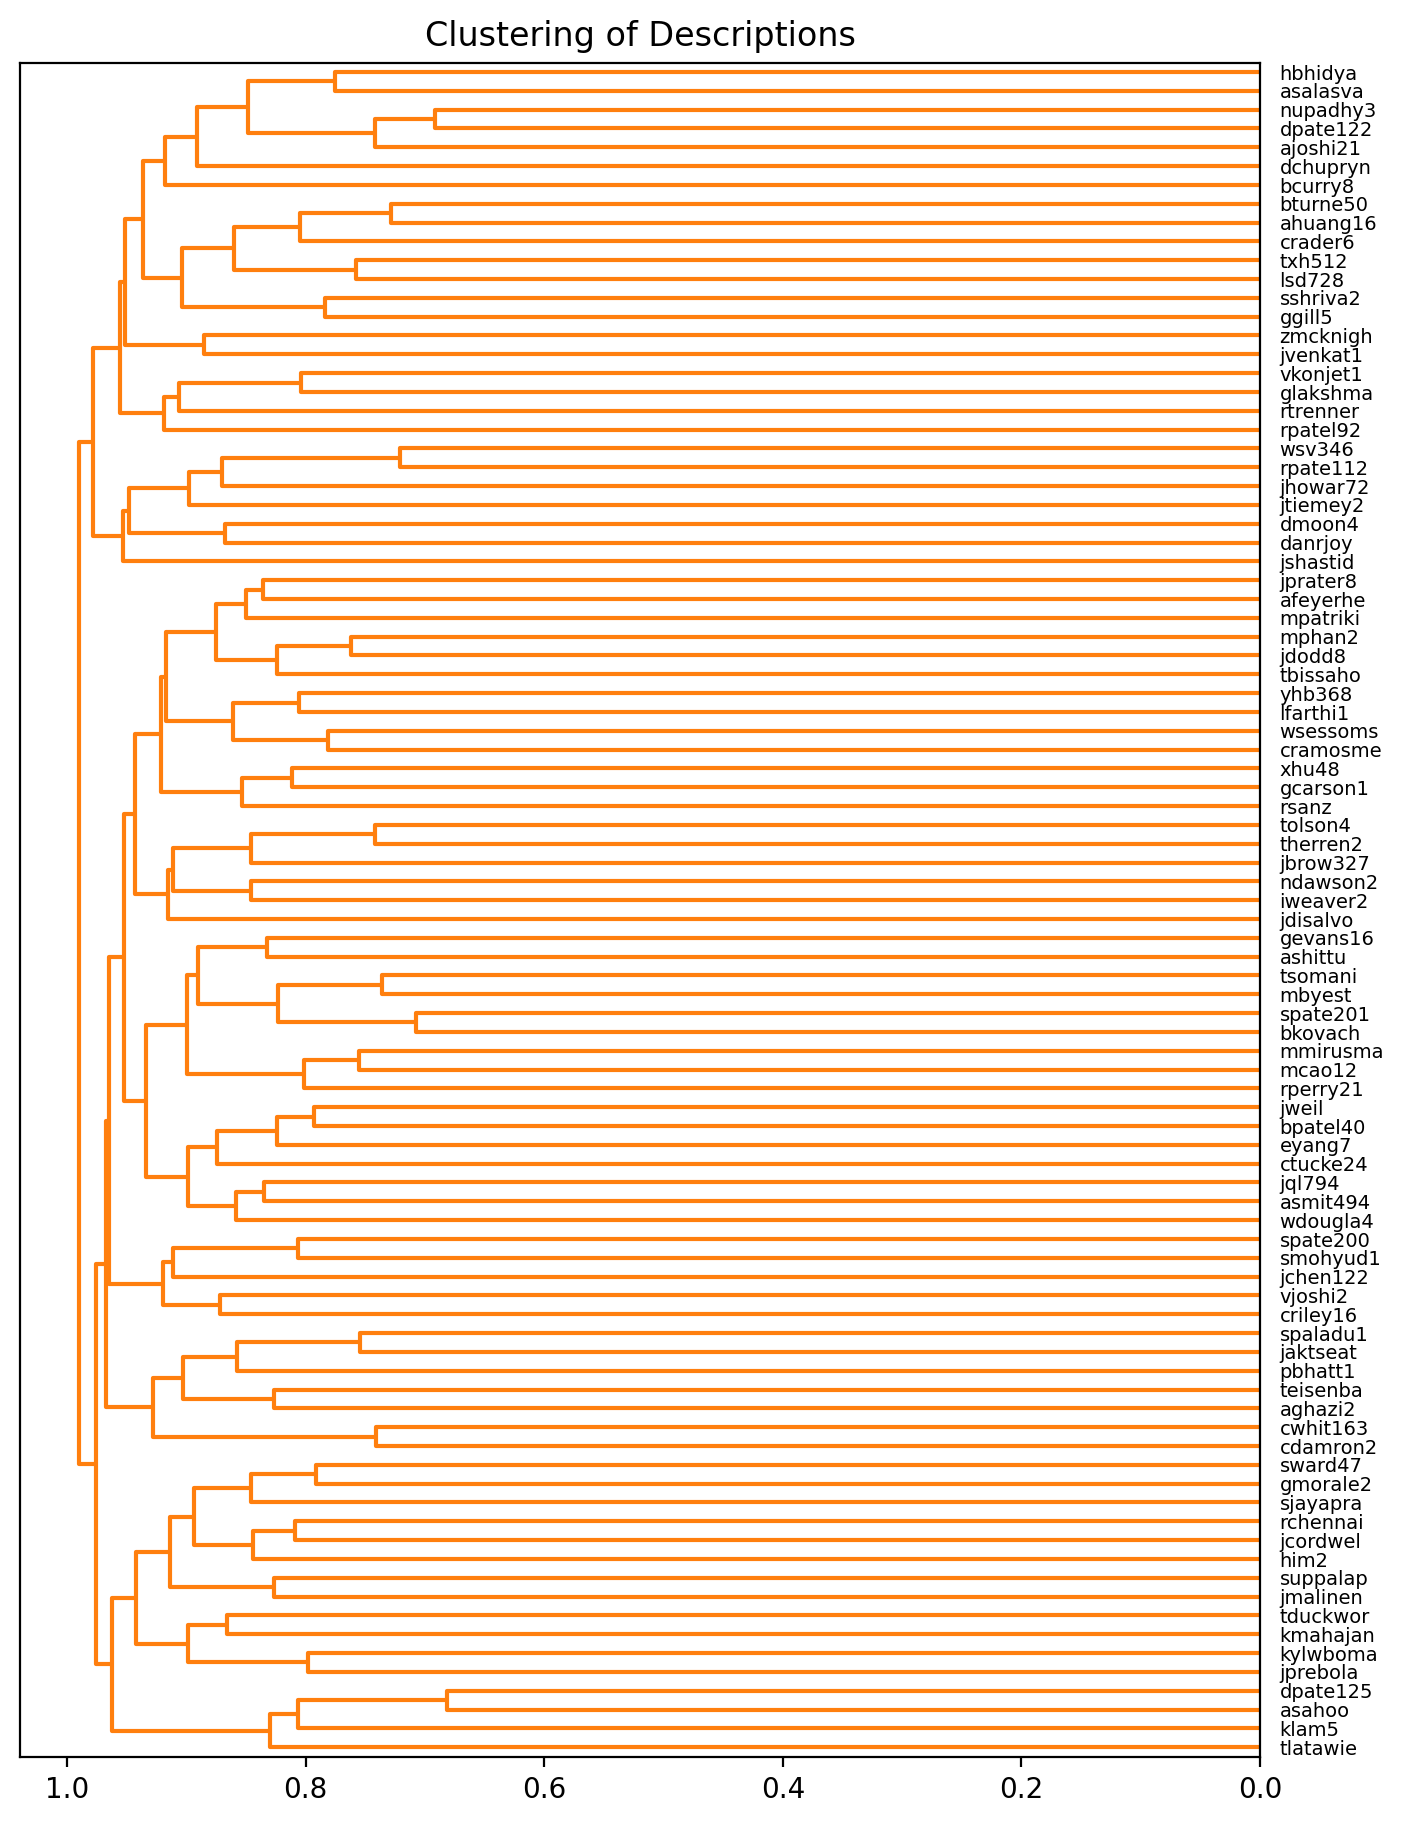

In [45]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math, sys
import matplotlib.pyplot as plt
import numpy as np
import re
import random

%matplotlib inline

# Calculate cosine distance (clustering needs distance, not similarity)
dist1 = pdist(tfidf.toarray(), 'cosine')
minVal = min(dist1)
print(minVal)
d1 = len(files)-1
ij = np.where(dist1==minVal)[0][0]
for i in range(0,d1):
    for j in range (i+1,d1):
        ij -= 1
        if ij == 0:
            break
    else:
        continue
    break



# Do clustering
linkage_matrix = linkage (dist1, method='complete')
#print(linkage_matrix)

# Plot results
fig = plt.figure(1, figsize=(8, 11),dpi=200)
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,leaf_font_size =7
               )
j = 0
while j < 90:
  for i in range (1,random.randint(6,7)):
    sys.stdout.write(flab[ddata['leaves'][j]]+' ')
    j+=1
    if (j>=90): break
  sys.stdout.write('\n')

plt.title("Clustering of Descriptions")
fig.savefig("teaming.png")

# Investigate interactive graph

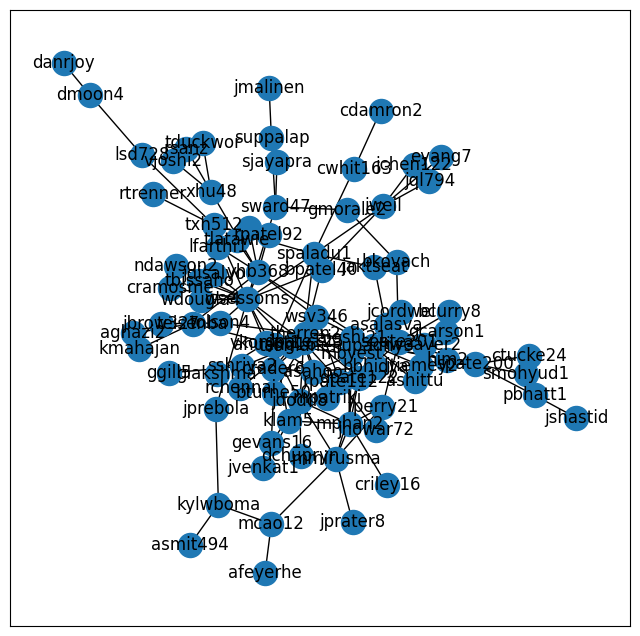

In [46]:

import networkx as nx
import json
import matplotlib.pyplot as plt
%matplotlib inline


# use these distances to create a graph by cutting links below .2
lbl = {}
nxg = nx.Graph()
for i in range(len(files)-1):
    nxg.add_node(i, label=flab[i])
    lbl[i]=flab[i]
for i in range(len(files)-1):
    nLinks = 0
    maxVal = 0
    jMax = 0
    for j in range(i+1,len(files)):
        if df.iloc[i,j] > maxVal:
            maxVal = df.iloc[i,j]
            if i != j: jMax = j
        if (df.iloc[i,j] > .2):
            nLinks += 1
            nxg.add_edge(i, j, weight=math.sqrt(df.iloc[i,j]*150+1),color='yellow')
    if nLinks == 0:
        nxg.add_edge(i, jMax, weight=10,color='red')

#print (nxg.nodes())

fig, ax = plt.subplots(1, 1, figsize=(8, 8));
nx.draw_networkx(nxg, ax=ax, labels=lbl )


nodes = [{'name': nxg.nodes()[i]  } for i in nxg.nodes() ]
links = [{'source': u[0], 'target': u[1]} for u in nxg.edges()]
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4,)



